In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import os
import pathlib
import sys
import csv

from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')

In [43]:
file = os.listdir('../src')
file

['pdc_data_zenodo.csv', 'pdc_data_zenodo_codeblock.csv']

In [44]:
df = pd.read_csv('../src/pdc_data_zenodo.csv', encoding='latin1')
codeblock = pd.read_csv('../src/pdc_data_zenodo_codeblock.csv', encoding='latin1')


In [45]:
df.head()

,country,region,education level,gender,age group,household size,crop type,farm size (acres),farming experience,land tenure,fertiliser,certified seeds,pest management,phone ownership,internet use,agricultural financing,bank account,mobile account,losses-rain pattern,losses-drought,losses-heatwave,losses-storms,losses-mudslides,farmer organization,service provider awareness,agricultural continuity,land expansion
0,Kenya,Eastern Africa,primary,male,65 or older,8.0,food crops,NaN,NaN,own all the land,yes,yes,yes,yes,NaN,NaN,no,no,yes,no,no,no,no,NaN,yes,NaN,NaN
1,Kenya,Eastern Africa,primary,female,35-44,3.0,food crops,NaN,NaN,rent all the land,no,no,no,yes,NaN,NaN,no,no,yes,yes,no,no,no,NaN,no,NaN,NaN
2,Kenya,Eastern Africa,primary,female,55-64,4.0,food crops,NaN,NaN,own all the land,no,no,no,yes,NaN,NaN,no,no,yes,yes,no,no,no,NaN,yes,NaN,NaN
3,Kenya,Eastern Africa,secondary,female,45-54,2.0,food crops,NaN,NaN,own all the land,no,no,yes,yes,NaN,NaN,yes,yes,yes,no,no,no,no,NaN,yes,NaN,NaN
4,Kenya,Eastern Africa,no education,male,65 or older,5.0,food crops,NaN,NaN,own all the land,yes,yes,yes,yes,NaN,NaN,yes,yes,yes,no,no,no,no,NaN,yes,NaN,NaN


In [73]:
codeblock.head(50)

,variable,question
0,country,country where survey was conducted
1,region,region where survey was conducted
2,education level,What is the highest level of education that th...
3,gender,What is the gender of the farmer?
4,age group,What is the age of the farmer?
5,household size,How many people live in the household?
6,farm size (acres),What is the total size of the farm?
7,crop type,Type of focus crop
8,farming experience,For how many years have you been farming on th...
9,land tenure,Do you own or rent the land you use for farming?


In [47]:
df.shape

(15653, 27)

In [48]:
df.describe()

,household size,farm size (acres)
count,15472.000000,1699.000000
mean,5.570773,3.385638
std,3.121177,2.403150
min,1.000000,0.186000
25%,4.000000,1.500000
50%,5.000000,2.718100
75%,7.000000,4.942000
max,50.000000,9.884000


In [49]:
df.isnull().sum()

country                           0
region                          233
education level                 875
gender                          497
age group                      4164
household size                  181
crop type                         0
farm size (acres)             13954
farming experience             6300
land tenure                     392
fertiliser                     6276
certified seeds                6276
pest management                6276
phone ownership                1891
internet use                   6163
agricultural financing         1817
bank account                   1930
mobile account                 2193
losses-rain pattern            3774
losses-drought                 3774
losses-heatwave                3774
losses-storms                  3774
losses-mudslides               3774
farmer organization            6894
service provider awareness     2690
agricultural continuity        8993
land expansion                 8784
dtype: int64

In [52]:
def get_categorical_series(df):
    categories = []
    simple_impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    for i in df.select_dtypes(include=['object']):
        categories.append(i)
    df[categories] = simple_impute.fit_transform(df[categories])
    return df.head()

In [53]:
get_categorical_series(df)

,country,region,education level,gender,age group,household size,crop type,farm size (acres),farming experience,land tenure,fertiliser,certified seeds,pest management,phone ownership,internet use,agricultural financing,bank account,mobile account,losses-rain pattern,losses-drought,losses-heatwave,losses-storms,losses-mudslides,farmer organization,service provider awareness,agricultural continuity,land expansion
0,Kenya,Eastern Africa,primary,male,65 or older,8.0,food crops,NaN,>10 years,own all the land,yes,yes,yes,yes,no,no,no,no,yes,no,no,no,no,yes,yes,yes,increase
1,Kenya,Eastern Africa,primary,female,35-44,3.0,food crops,NaN,>10 years,rent all the land,no,no,no,yes,no,no,no,no,yes,yes,no,no,no,yes,no,yes,increase
2,Kenya,Eastern Africa,primary,female,55-64,4.0,food crops,NaN,>10 years,own all the land,no,no,no,yes,no,no,no,no,yes,yes,no,no,no,yes,yes,yes,increase
3,Kenya,Eastern Africa,secondary,female,45-54,2.0,food crops,NaN,>10 years,own all the land,no,no,yes,yes,no,no,yes,yes,yes,no,no,no,no,yes,yes,yes,increase
4,Kenya,Eastern Africa,no education,male,65 or older,5.0,food crops,NaN,>10 years,own all the land,yes,yes,yes,yes,no,no,yes,yes,yes,no,no,no,no,yes,yes,yes,increase


In [54]:
df.isnull().sum()

country                           0
region                            0
education level                   0
gender                            0
age group                         0
household size                  181
crop type                         0
farm size (acres)             13954
farming experience                0
land tenure                       0
fertiliser                        0
certified seeds                   0
pest management                   0
phone ownership                   0
internet use                      0
agricultural financing            0
bank account                      0
mobile account                    0
losses-rain pattern               0
losses-drought                    0
losses-heatwave                   0
losses-storms                     0
losses-mudslides                  0
farmer organization               0
service provider awareness        0
agricultural continuity           0
land expansion                    0
dtype: int64

In [55]:
def get_quantitative_series(df):
    numericals = []
    simple_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
    for i in df.select_dtypes(include=['float64', 'int64']):
        numericals.append(i)
    df[numericals] = simple_impute.fit_transform(df[numericals])
    return df.head()

In [56]:
get_quantitative_series(df)

,country,region,education level,gender,age group,household size,crop type,farm size (acres),farming experience,land tenure,fertiliser,certified seeds,pest management,phone ownership,internet use,agricultural financing,bank account,mobile account,losses-rain pattern,losses-drought,losses-heatwave,losses-storms,losses-mudslides,farmer organization,service provider awareness,agricultural continuity,land expansion
0,Kenya,Eastern Africa,primary,male,65 or older,8.0,food crops,3.385638,>10 years,own all the land,yes,yes,yes,yes,no,no,no,no,yes,no,no,no,no,yes,yes,yes,increase
1,Kenya,Eastern Africa,primary,female,35-44,3.0,food crops,3.385638,>10 years,rent all the land,no,no,no,yes,no,no,no,no,yes,yes,no,no,no,yes,no,yes,increase
2,Kenya,Eastern Africa,primary,female,55-64,4.0,food crops,3.385638,>10 years,own all the land,no,no,no,yes,no,no,no,no,yes,yes,no,no,no,yes,yes,yes,increase
3,Kenya,Eastern Africa,secondary,female,45-54,2.0,food crops,3.385638,>10 years,own all the land,no,no,yes,yes,no,no,yes,yes,yes,no,no,no,no,yes,yes,yes,increase
4,Kenya,Eastern Africa,no education,male,65 or older,5.0,food crops,3.385638,>10 years,own all the land,yes,yes,yes,yes,no,no,yes,yes,yes,no,no,no,no,yes,yes,yes,increase


In [70]:
all_columns = ['country', 'region', 'education level', 'gender', 'age group', 'household size', 'crop type', 'farm size (acres)', 'farming experience', 
        'land tenure', 'fertiliser', 'certified seeds', 'pest management', 'phone ownership', 'internet use', 'agricultural financing', 
        'bank account', 'mobile account', 'losses-rain pattern', 'losses-drought', 'losses-heatwave', 'losses-storms', 'losses-mudslides', 
        'farmer organization', 'service provider awareness', 'agricultural continuity', 'land expansion']

categorical_columns = ['region', 'education level', 'gender', 'age group', 'crop type', 'farming experience', 
        'land tenure', 'fertiliser', 'certified seeds', 'pest management', 'phone ownership', 'internet use', 'agricultural financing', 
        'bank account', 'mobile account', 'losses-rain pattern', 'losses-drought', 'losses-heatwave', 'losses-storms', 'losses-mudslides', 
        'farmer organization', 'service provider awareness', 'agricultural continuity', 'land expansion']

numerical_columns = ['household size', 'farm size (acres)']

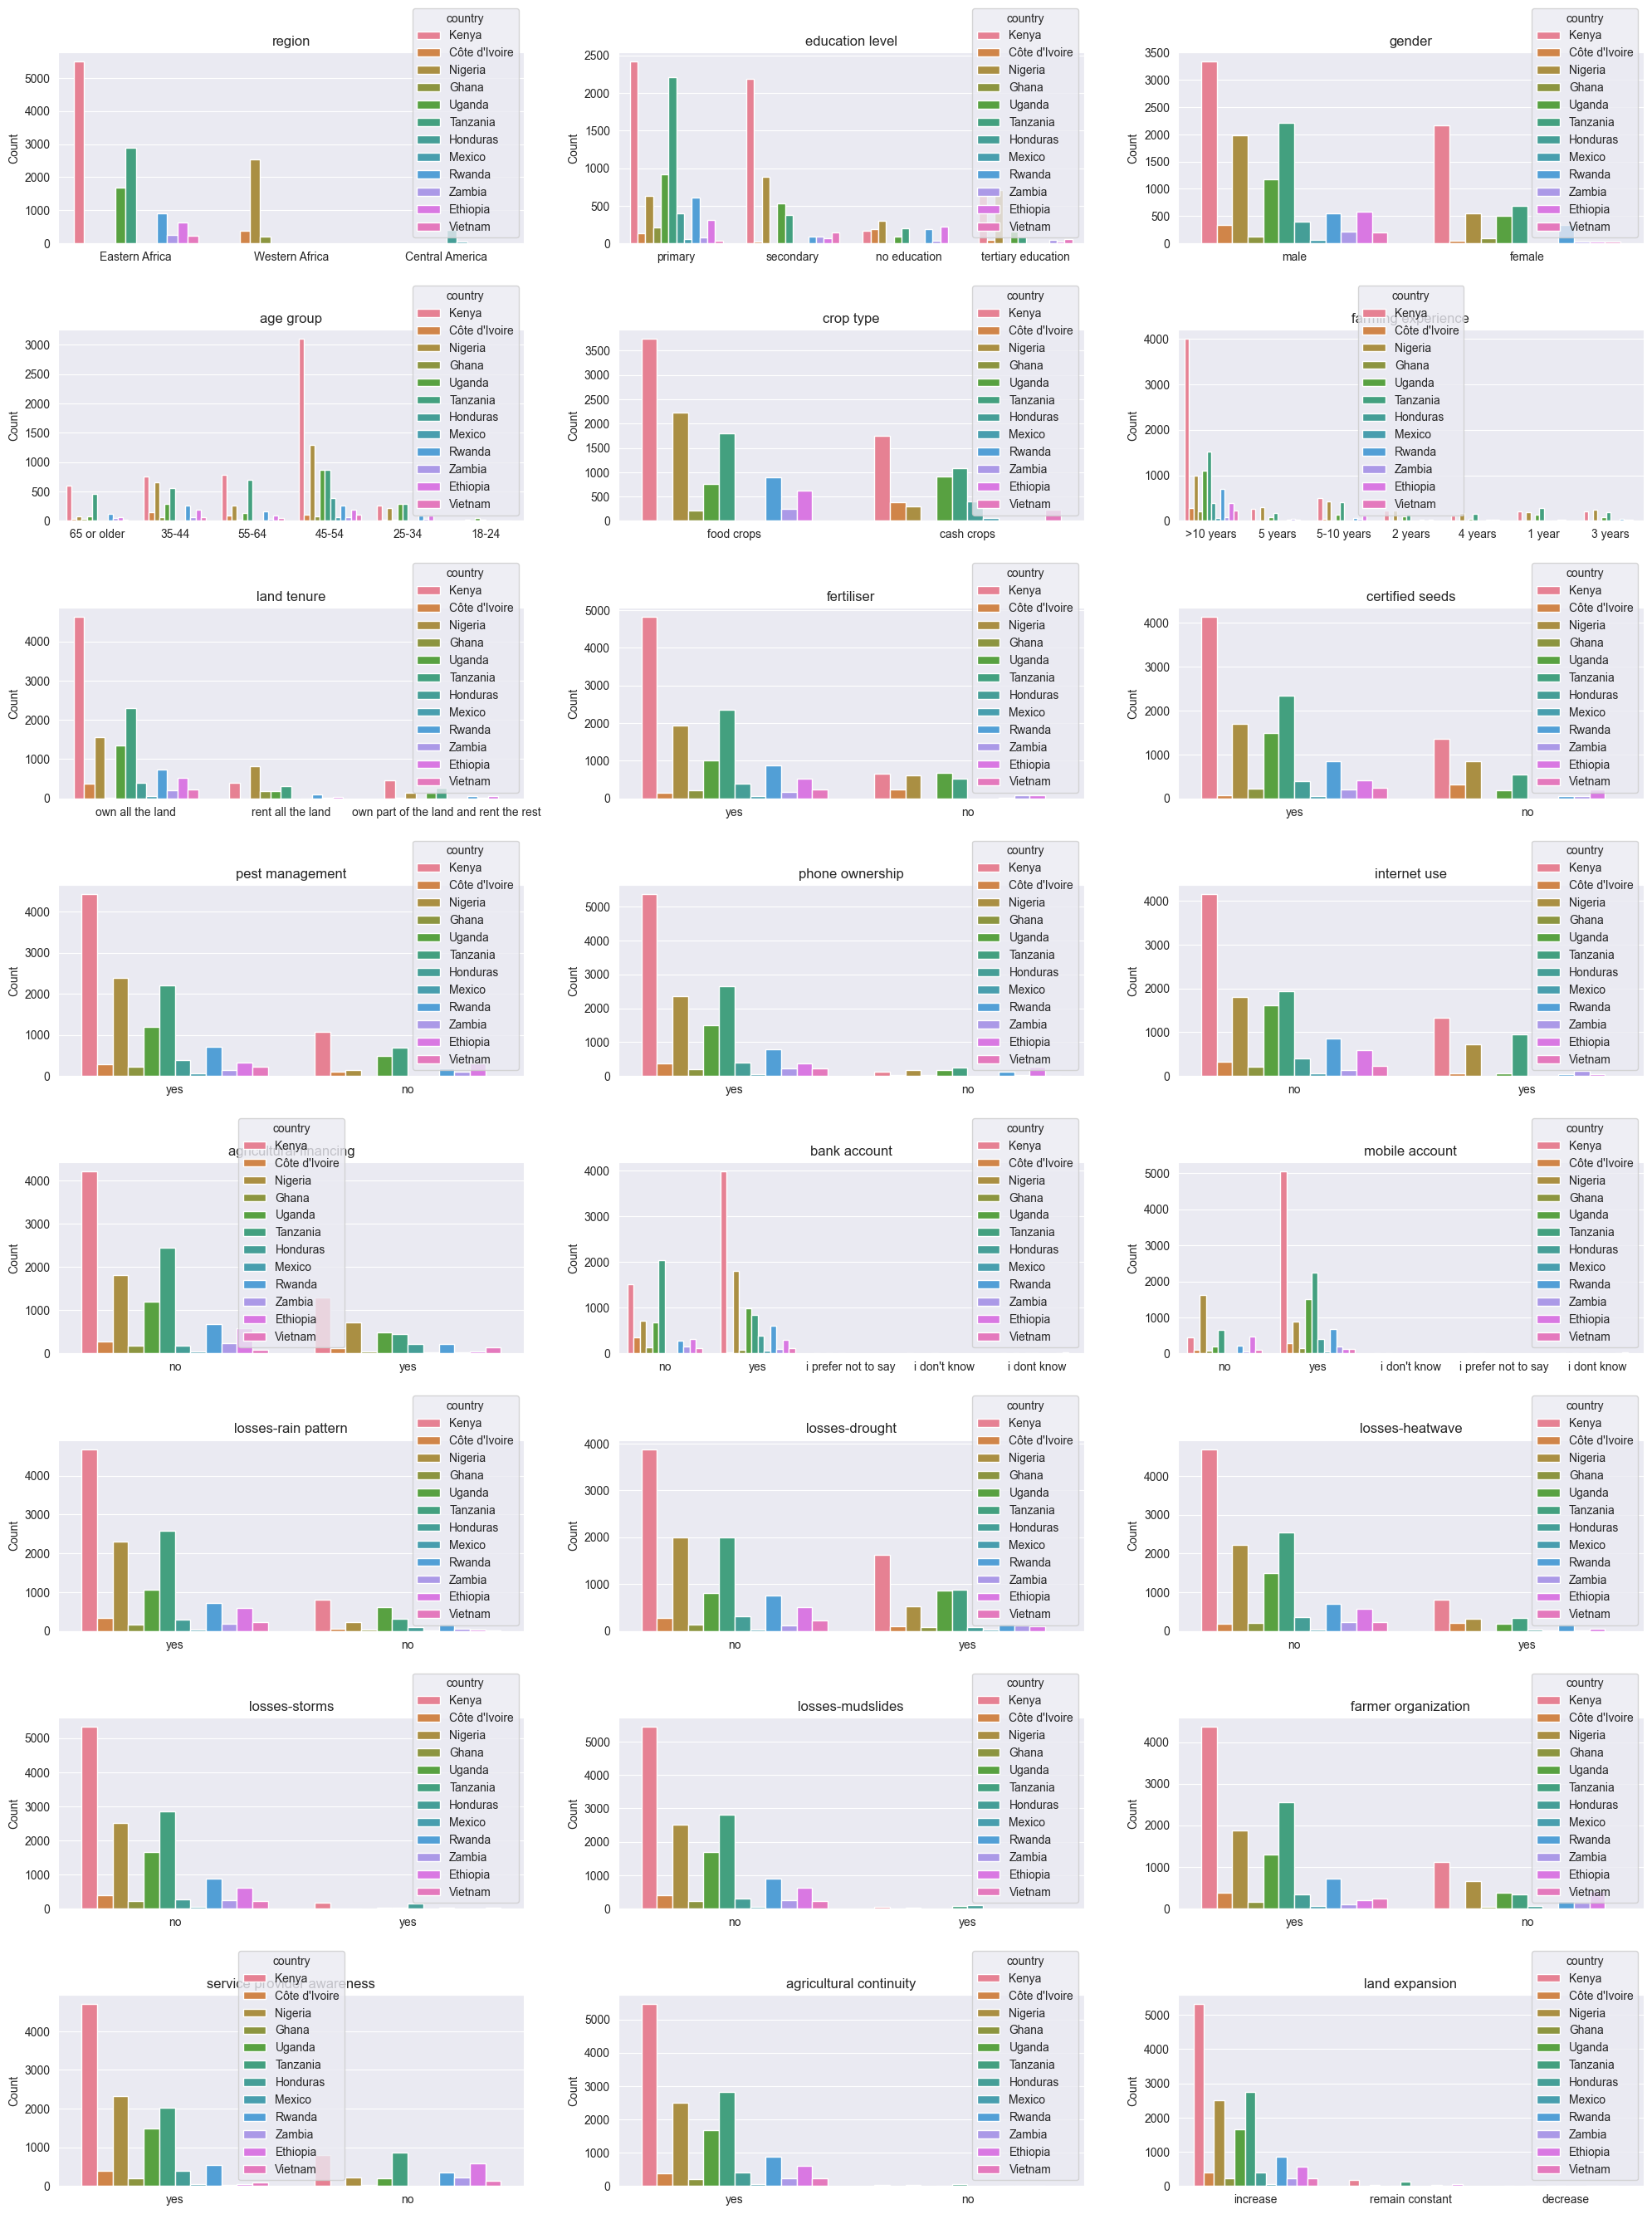

In [84]:

# Create the subplot
fig, axes = plt.subplots(9, 3, figsize=(20, 30))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through the columns and create plots
for i, col in enumerate(categorical_columns):
    sb.countplot(x=df[col], ax=axes[i], hue=df['country'])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove unused subplots if any
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout

plt.tight_layout()
plt.show()

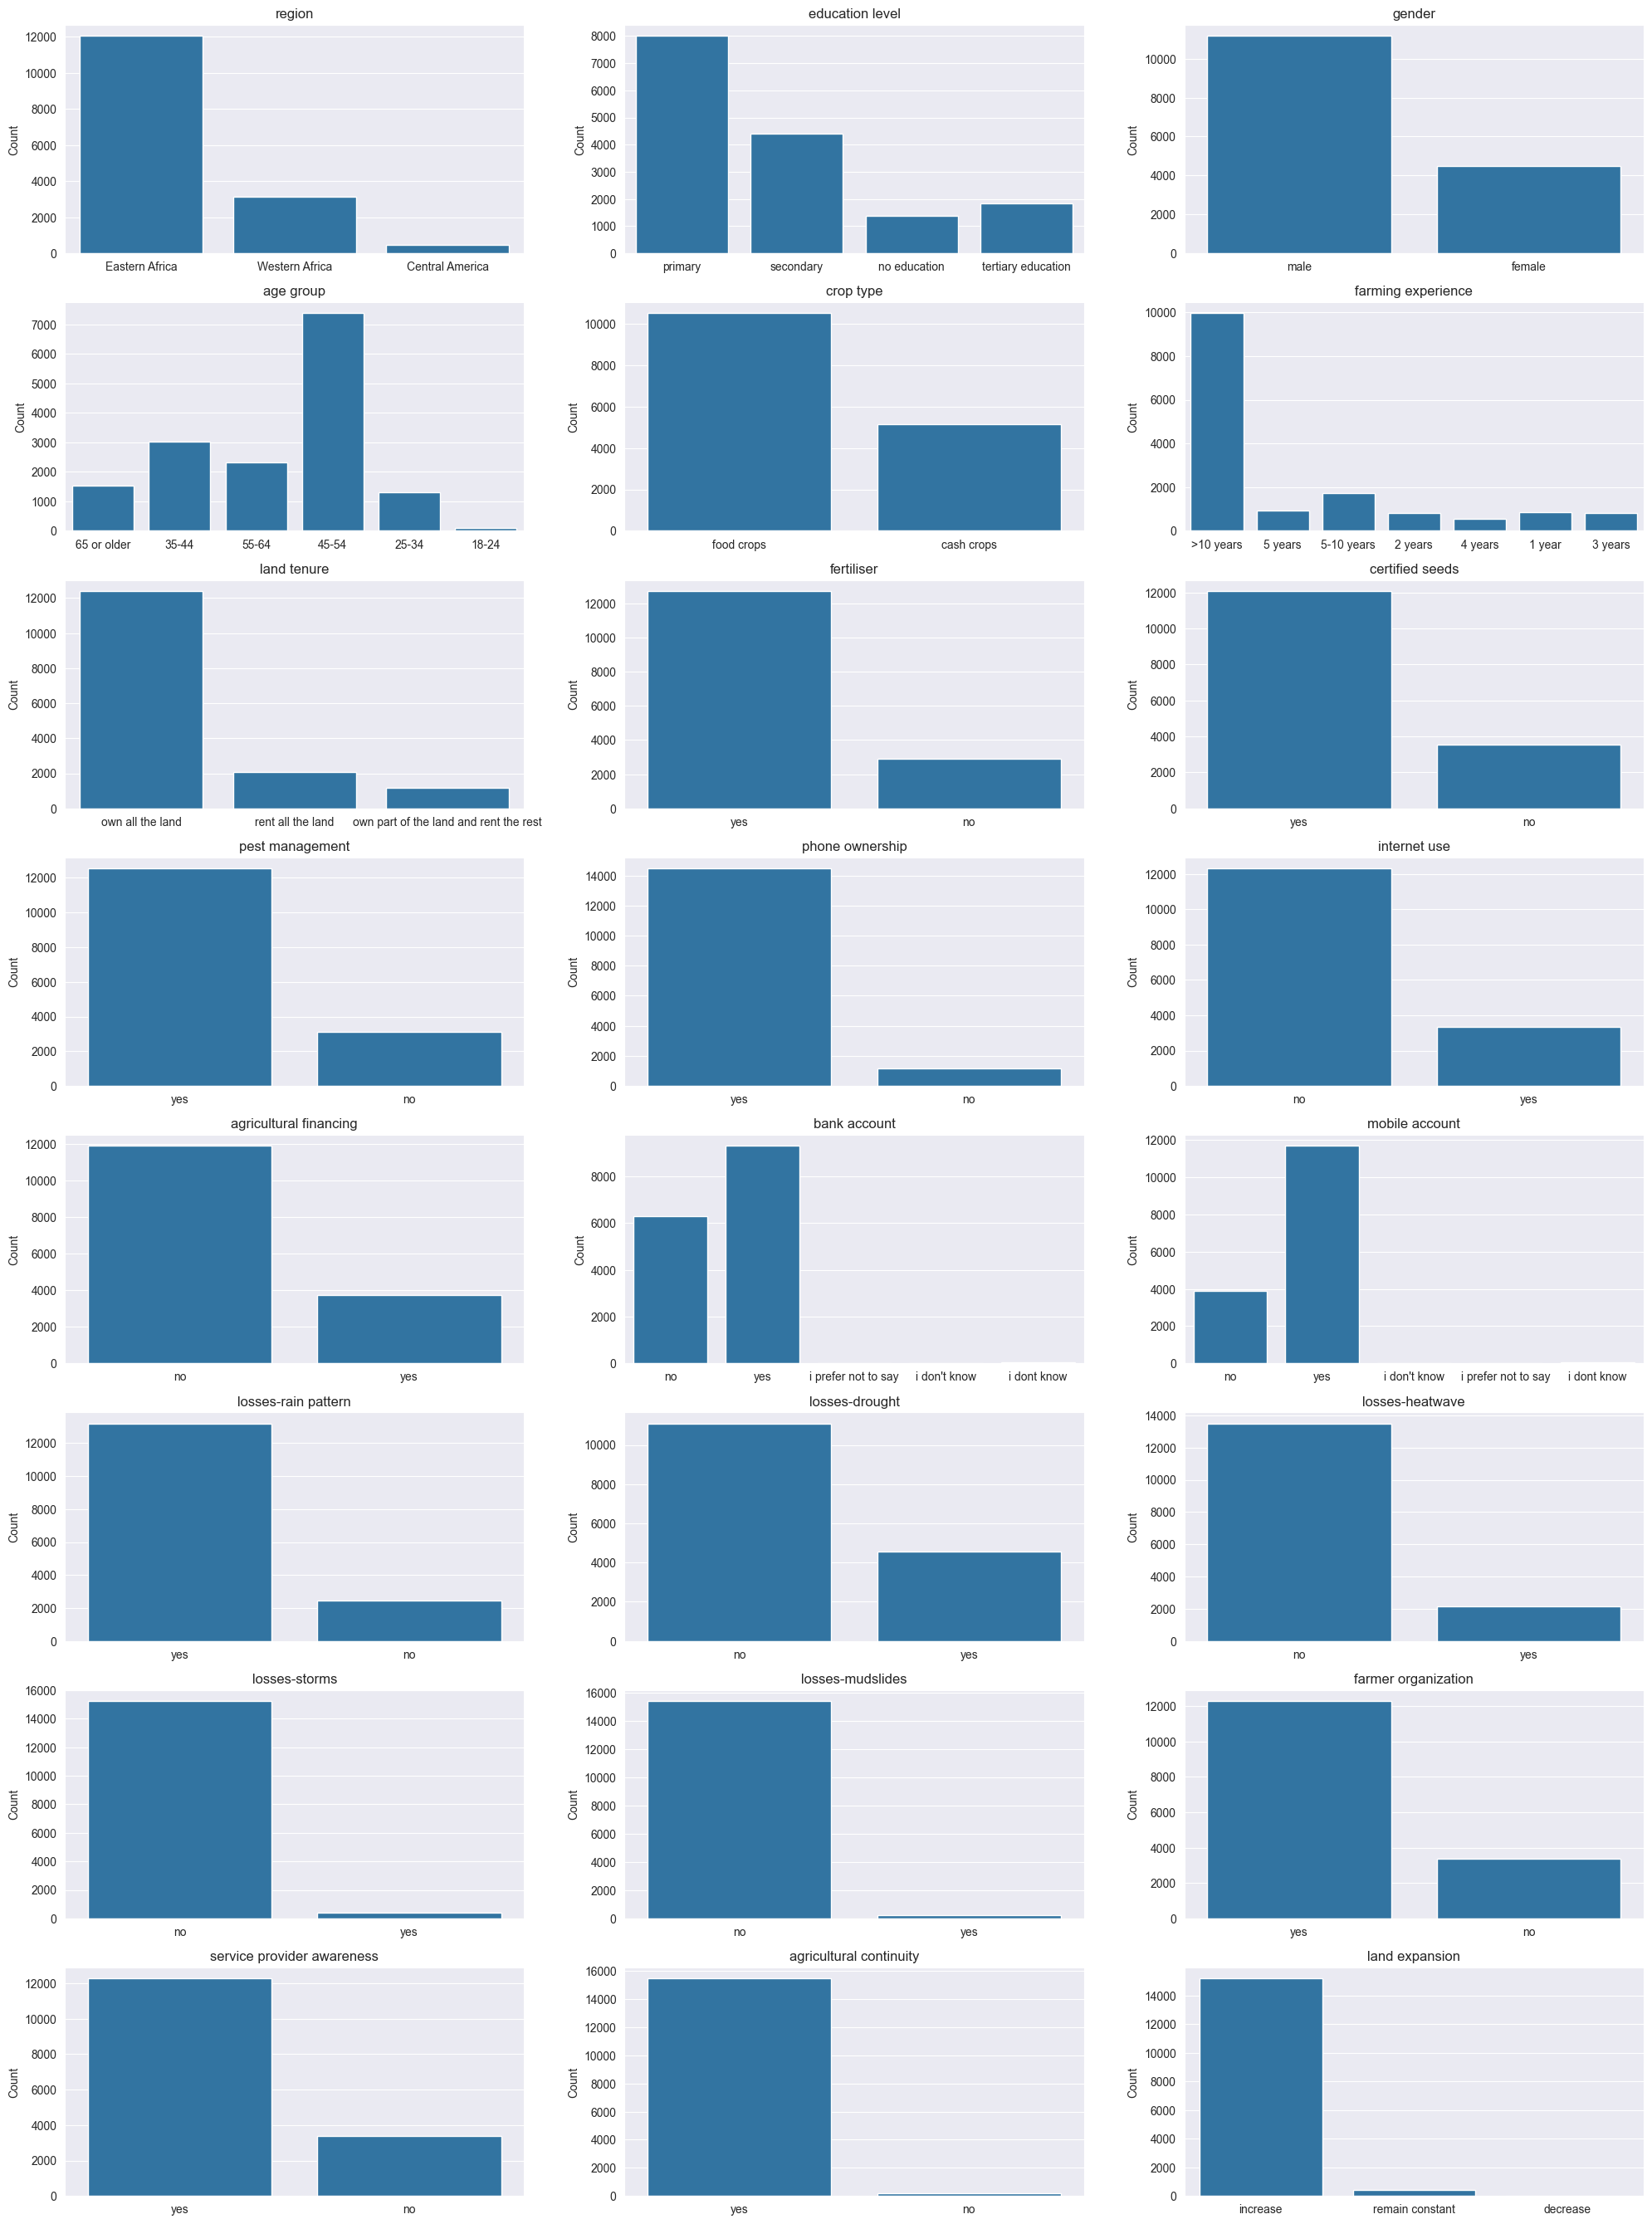

In [89]:

country_grp = df.groupby('country')
get_country = country_grp.get_group('Kenya')

# Create the subplot
fig, axes = plt.subplots(9, 3, figsize=(20, 30))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through the columns and create plots
for i, col in enumerate(get_country[categorical_columns]):
    sb.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove unused subplots if any
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout

plt.tight_layout()
plt.show()

In [85]:
df['country'].value_counts()

country
Kenya            5498
Tanzania         2889
Nigeria          2530
Uganda           1681
Rwanda            895
Ethiopia          622
Honduras          395
Côte d'Ivoire     387
Zambia            249
Vietnam           233
Ghana             215
Mexico             59
Name: count, dtype: int64

In [125]:
# country_grp.get_group()
total_observations = len(country_grp['country'].unique())
all_observations = [i for i in country_grp['country'].unique().iloc[0:total_observations]]
all_observations..str.replace("'[]", "")

AttributeError: 'list' object has no attribute 'str'

In [110]:
len([i, j in enumerate(country_grp['country'].unique())])

2

In [117]:
len(country_grp['country'].unique())

12

In [127]:
country_grp.groups.keys()

dict_keys(["Côte d'Ivoire", 'Ethiopia', 'Ghana', 'Honduras', 'Kenya', 'Mexico', 'Nigeria', 'Rwanda', 'Tanzania', 'Uganda', 'Vietnam', 'Zambia'])

<Axes: xlabel='gender'>

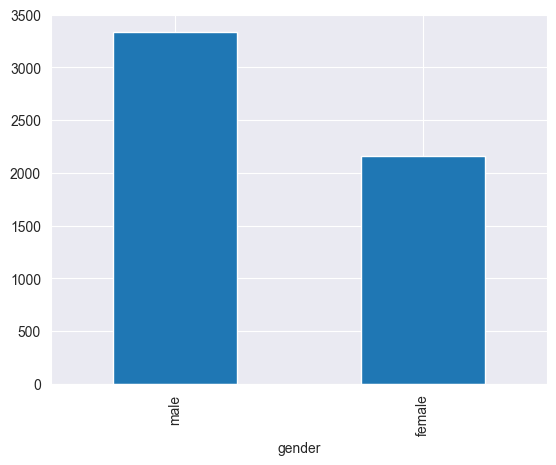

In [132]:
get_country['gender'].value_counts().plot(kind='bar')